In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
fraud_df=pd.read_csv('loan_prediction.csv')
fraud_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
#finding null values

In [5]:
fraud_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
 for col in ['Gender', 'Married', 'Dependents','Self_Employed','Loan_Amount_Term','Credit_History']:
        fraud_df[col].fillna(fraud_df[col].mode()[0], inplace=True)

In [7]:

fraud_df.LoanAmount = fraud_df.LoanAmount.fillna(fraud_df.LoanAmount.mean())

In [8]:
fraud_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
fraud_df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565620,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059383,0.011134
LoanAmount,0.565620,0.187828,1.000000,0.036475,-0.001431
Loan_Amount_Term,-0.046531,-0.059383,0.036475,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.001431,-0.004705,1.000000


In [10]:
fraud_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

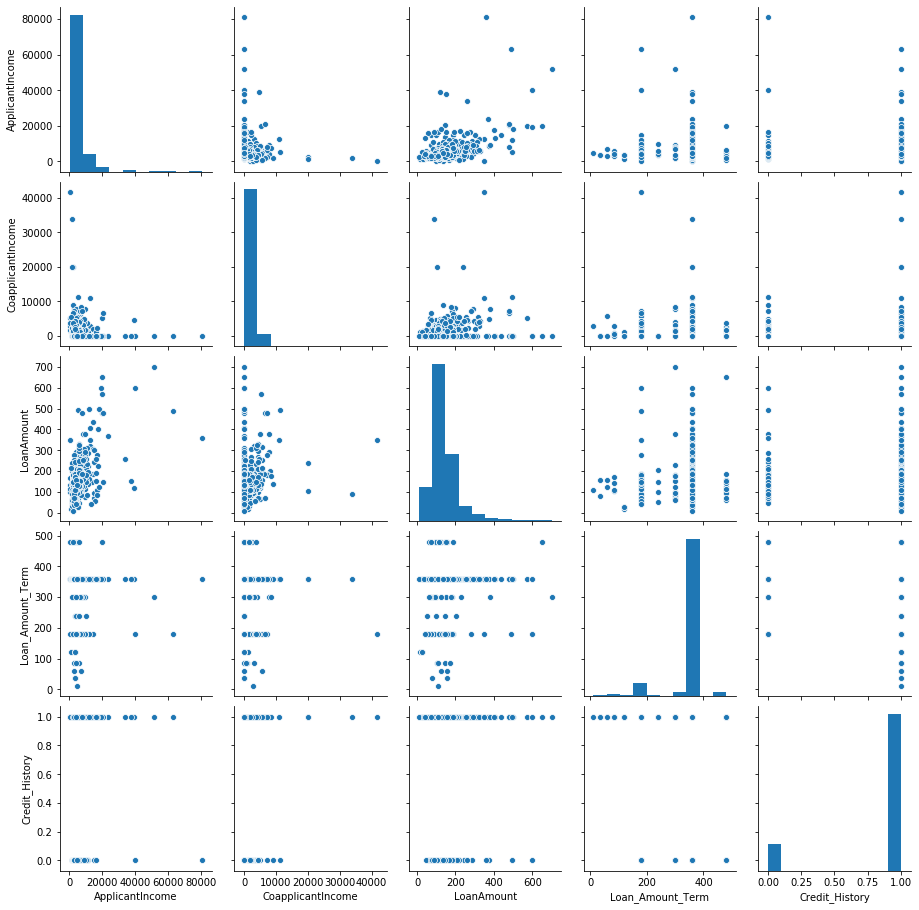

In [11]:
sns.pairplot(data=fraud_df)

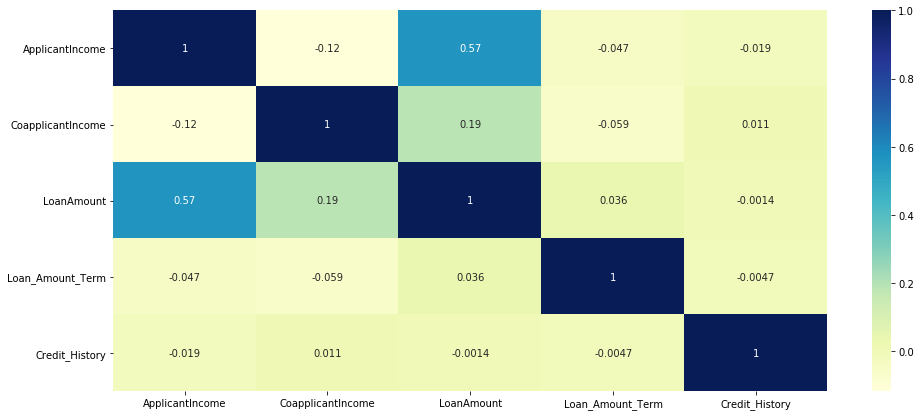

In [12]:
plt.figure(figsize=(16,7))
sns.heatmap(fraud_df.corr(),annot=True,cmap='YlGnBu')
plt.show()

(array([0, 1]), <a list of 2 Text xticklabel objects>)

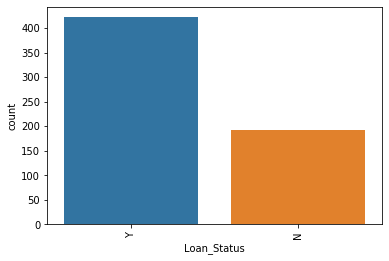

In [13]:
sns.countplot(x ='Loan_Status', data = fraud_df)
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

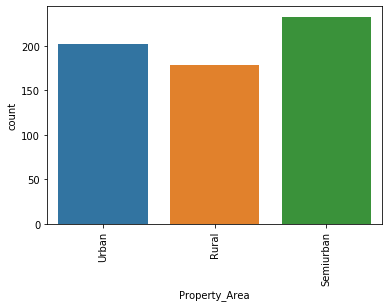

In [14]:
sns.countplot(x ='Property_Area', data = fraud_df)
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

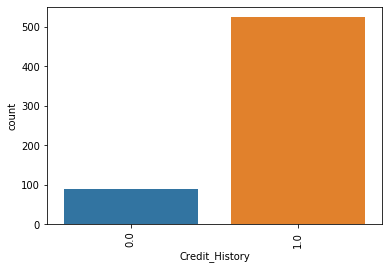

In [15]:
sns.countplot(x ='Credit_History', data = fraud_df)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

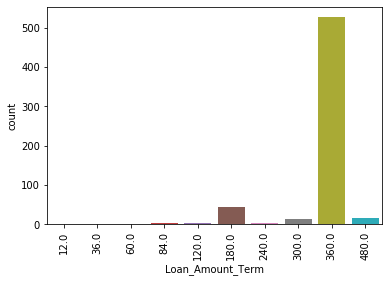

In [16]:
sns.countplot(x ='Loan_Amount_Term', data = fraud_df)
plt.xticks(rotation=90)

In [17]:
fraud_df['LoanAmount'].value_counts().unique

<bound method Series.unique of 146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
570.000000     1
300.000000     1
376.000000     1
117.000000     1
311.000000     1
Name: LoanAmount, Length: 204, dtype: int64>

In [18]:
fraud_df['CoapplicantIncome'].value_counts().unique

<bound method Series.unique of 0.0       273
1666.0      5
2083.0      5
2500.0      5
1750.0      3
         ... 
7166.0      1
2138.0      1
2166.0      1
3541.0      1
3021.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64>

(array([0, 1]), <a list of 2 Text xticklabel objects>)

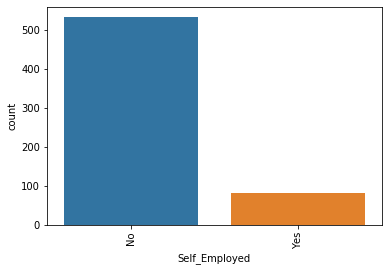

In [19]:
sns.countplot(x ='Self_Employed', data = fraud_df)
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

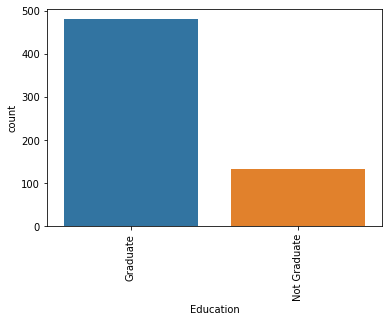

In [20]:
sns.countplot(x ='Education', data = fraud_df)
plt.xticks(rotation=90)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

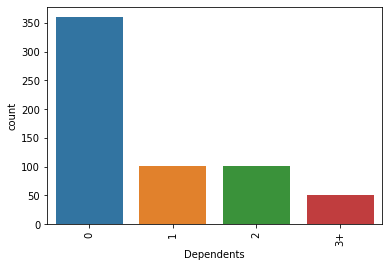

In [21]:
sns.countplot(x ='Dependents', data = fraud_df)
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

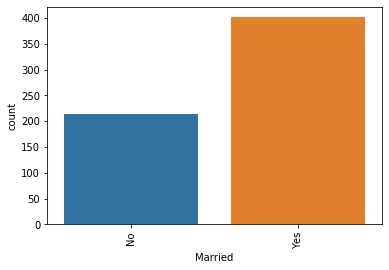

In [22]:
sns.countplot(x ='Married', data = fraud_df)
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

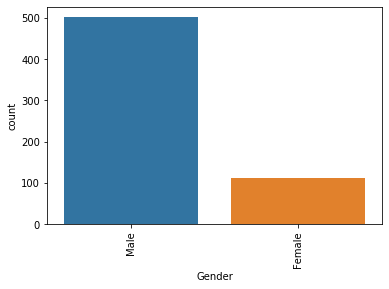

In [23]:
sns.countplot(x ='Gender', data = fraud_df)
plt.xticks(rotation=90)

In [24]:
fraud_df['Loan_Status']=fraud_df['Loan_Status'].map({'N': 0, 'Y': 1})

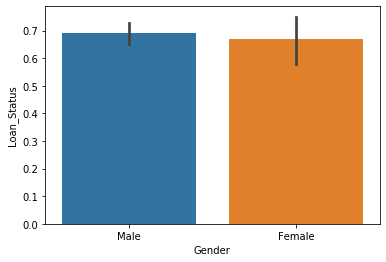

In [25]:
sns.barplot(x="Gender",y="Loan_Status",data=fraud_df)

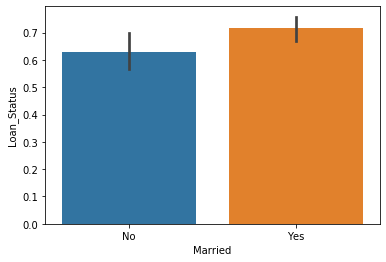

In [26]:
sns.barplot(x="Married",y="Loan_Status",data=fraud_df)

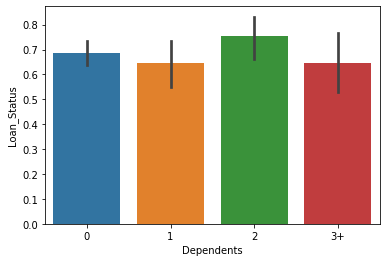

In [27]:
sns.barplot(x="Dependents",y="Loan_Status",data=fraud_df)

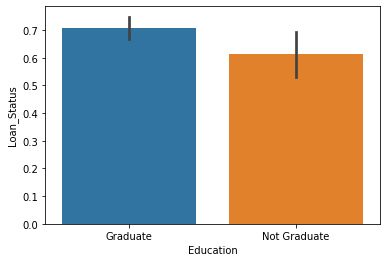

In [28]:
sns.barplot(x="Education",y="Loan_Status",data=fraud_df)

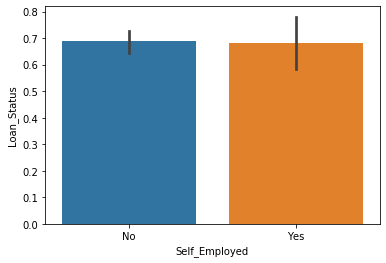

In [29]:
sns.barplot(x="Self_Employed",y="Loan_Status",data=fraud_df)

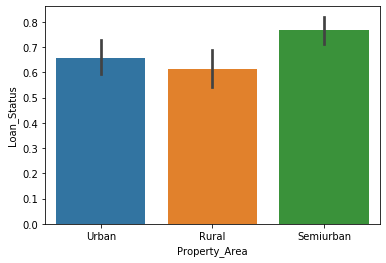

In [30]:
sns.barplot(x="Property_Area",y="Loan_Status",data=fraud_df)

In [31]:
fraud_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

In [32]:
fraud_df['Gender']=fraud_df['Gender'].map({'Male': 0, 'Female': 1})

In [33]:
fraud_df['Married']=fraud_df['Married'].map({'No': 0, 'Yes': 1})

In [34]:
fraud_df['Education']=fraud_df['Education'].map({'Not Graduate': 0, 'Graduate': 1})

In [35]:
fraud_df['Self_Employed']=fraud_df['Self_Employed'].map({'No': 0, 'Yes': 1})

In [36]:
fraud_df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents            object
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

In [37]:
fraud_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [38]:
fraud_df.Dependents.unique()

array(['0', '1', '2', '3+'], dtype=object)

In [39]:
fraud_df.Property_Area.unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [40]:
fraud_df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents            object
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

In [41]:
fraud_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [42]:
fraud_df.drop("Loan_ID",axis=1,inplace=True)

In [43]:
fraud_df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [44]:
fraud_df=pd.get_dummies(fraud_df,columns=['Dependents','Property_Area'])

In [45]:
fraud_df.dtypes

Gender                       int64
Married                      int64
Education                    int64
Self_Employed                int64
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Loan_Status                  int64
Dependents_0                 uint8
Dependents_1                 uint8
Dependents_2                 uint8
Dependents_3+                uint8
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
dtype: object

In [46]:
#Applying models

In [47]:
X=fraud_df.drop('Loan_Status',axis=1)
y=fraud_df["Loan_Status"]

In [48]:
X

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,0,1
1,0,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,1,0,0,1,0,0
2,0,1,1,1,3000,0.0,66.000000,360.0,1.0,1,0,0,0,0,0,1
3,0,1,0,0,2583,2358.0,120.000000,360.0,1.0,1,0,0,0,0,0,1
4,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,1,0,2900,0.0,71.000000,360.0,1.0,1,0,0,0,1,0,0
610,0,1,1,0,4106,0.0,40.000000,180.0,1.0,0,0,0,1,1,0,0
611,0,1,1,0,8072,240.0,253.000000,360.0,1.0,0,1,0,0,0,0,1
612,0,1,1,0,7583,0.0,187.000000,360.0,1.0,0,0,1,0,0,0,1


In [49]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [53]:
X_train

array([[-0.49343516,  0.77507823, -1.87504386, ..., -0.62317695,
        -0.79056942,  1.40682858],
       [-0.49343516,  0.77507823, -1.87504386, ...,  1.60468065,
        -0.79056942, -0.71081865],
       [-0.49343516, -1.29019234,  0.53332086, ..., -0.62317695,
         1.26491106, -0.71081865],
       ...,
       [ 2.02660871, -1.29019234,  0.53332086, ..., -0.62317695,
        -0.79056942,  1.40682858],
       [ 2.02660871,  0.77507823,  0.53332086, ..., -0.62317695,
         1.26491106, -0.71081865],
       [-0.49343516,  0.77507823,  0.53332086, ..., -0.62317695,
        -0.79056942,  1.40682858]])

In [54]:
y_train

553    0
601    1
261    1
496    1
529    1
      ..
71     1
106    1
270    1
435    1
102    1
Name: Loan_Status, Length: 429, dtype: int64

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve

In [56]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
acc_score=accuracy_score(pred,y_test)
acc_score

0.7837837837837838

In [57]:
from sklearn.model_selection import GridSearchCV
kn=KNeighborsClassifier()
parameters={'n_neighbors':(1,10)}
gd=GridSearchCV(kn,parameters)
gd.fit(X_train,y_train)
gd.best_params_

{'n_neighbors': 10}

In [58]:
dt=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy')}
gd=GridSearchCV(dt,parameters)
gd.fit(X_train,y_train)
gd.best_params_

{'criterion': 'gini'}

In [59]:
from sklearn.model_selection import GridSearchCV
sv=SVC()
parameters={'kernel':('linear','rbf'),'C':[1,10]}
gd=GridSearchCV(sv,parameters)
gd.fit(X_train,y_train)
gd.best_params_

{'C': 1, 'kernel': 'linear'}

In [60]:
model=[]
score=[]
cvs=[]


for i in [LogisticRegression(),KNeighborsClassifier(n_neighbors=10),DecisionTreeClassifier(criterion='gini'),SVC(C=1,kernel='linear')]:
    k=i
    model.append(i)
    print("\n")
    print("model calculation for ",i,"are:")
    k.fit(X_train,y_train)
    k.score(X_train,y_train)
    pred=k.predict(X_test)
    print(pred)
    AS=accuracy_score(pred,y_test)
    print("accuracy score is",AS)
    score.append(AS)
    cv_score=cross_val_score(k,X,y,cv=5,scoring='accuracy').mean()
    print('cv score is',cv_score)
    cvs.append(cv_score)
    print("")
    cm=confusion_matrix(pred,y_test)
    print(cm)
    print("")
    print(classification_report(pred,y_test))
    print("\n")



model calculation for  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) are:
[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1
 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0]
accuracy score is 0.7837837837837838
cv score is 0.8045448487271758

[[ 27   2]
 [ 38 118]]

              precision    recall  f1-score   support

           0       0.42      0.93      0.57        29
           1       0.98      0.76      0.86       156

    accurac

In [62]:
result=pd.DataFrame({'Model':['LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier','SVC'],'Accuracy score':[0.78,0.70,0.70,0.78],'cross _val_score':[0.80,0.715,0.705,0.78]})

result

,Model,Accuracy score,cross _val_score
0,LogisticRegression,0.78,0.800
1,KNeighborsClassifier,0.70,0.715
2,DecisionTreeClassifier,0.70,0.705
3,SVC,0.78,0.780


In [63]:
#Saving Logistic Regression model

In [64]:
from sklearn.externals import joblib 
  

joblib.dump(lr, 'fraud.pkl') 
  
lr_from_joblib = joblib.load('fraud.pkl')  
  
lr_from_joblib.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)